19
['Goals', 'Non-penalty xG', 'Shots', 'Assists', 'xG assisted', 'NpxG+xAG ', 'SCA', 'Passes', 'Pass%', 'Prog Pass', 'Prog Carries', 'Dribble%', 'Final 3rd touch', 'Prog pass rec', 'Tackles', 'Interceptions', 'Blocks', 'Cleared', 'Aerial%']
Enter player name: Lauren James


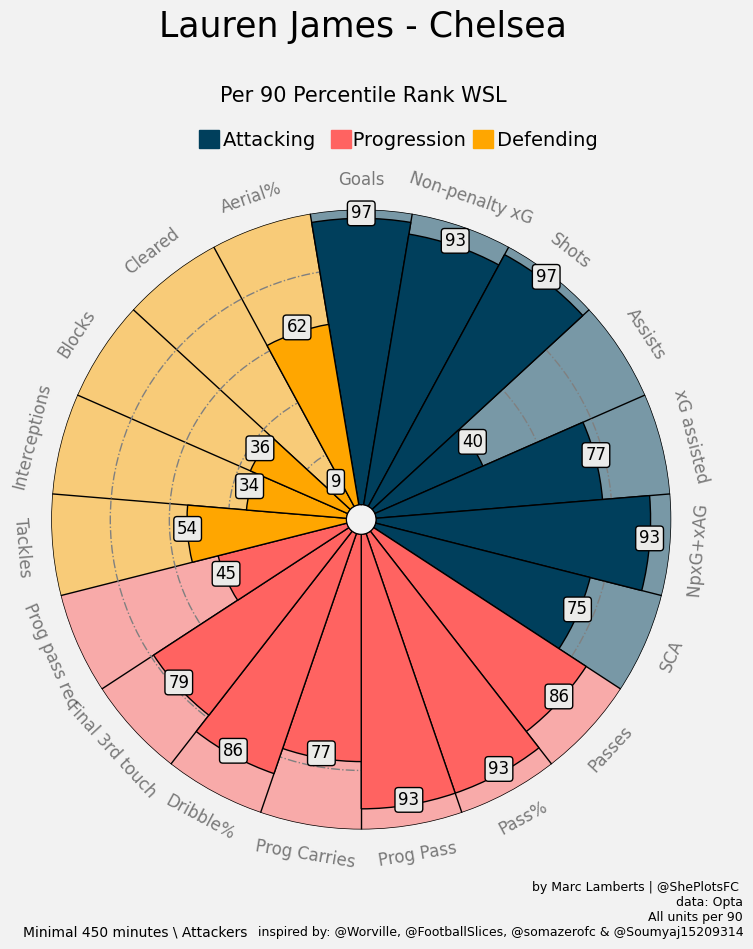

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

df = pd.read_excel("/Users/marclambertes/T5 Women.xlsx")
# Mount Google Drive (if your file is stored in Google Drive).

df = df[df['Comp'] == 'WSL']

df = df[df['Pos'].str.contains('FW')] #& df['Pos'].str.contains('MF')]

df = df[df['Min'] > 450]
df['NpxG+xAG per 90'] = df['npxGPer90'] + df['xAGPer90']
df["completion%"] = (df["PassesCompletedPer90"] / df["PassesAttemptedPer90"]) * 100
df = df[['Player', 'Squad', 'G+A', 'GoalsPer90', 'npxGPer90', 'Sh/90', 'AssistsPer90', 'xAGPer90',  'NpxG+xAG per 90', 'SCAPer90',
         'PassesAttemptedPer90', 'completion%',
         'ProgPassesPer90', 'ProgCarriesPer90', 'SuccDrbPer90', 'Att3rdTouchPer90', 'ProgPassesRecPer90',
         'TklPer90', 'IntPer90', 'BlocksPer90', 'ClrPer90', 'AerialWinsPer90'
          ]]

df['Goals'] = df['GoalsPer90']
df['Non-penalty xG'] = df['npxGPer90']
df['Shots'] = df['Sh/90']
df['Assists'] = df['AssistsPer90']
df['xG assisted'] = df['xAGPer90']
df['NpxG+xAG '] = df['NpxG+xAG per 90']
df['SCA'] = df['SCAPer90']

df['Passes'] = df['PassesAttemptedPer90']
df['Pass%'] = df['completion%']
df['Prog Pass'] = df['ProgPassesPer90']
df['Prog Carries'] = df['ProgCarriesPer90']
df['Dribble%'] = df['SuccDrbPer90']
df['Final 3rd touch'] = df['Att3rdTouchPer90']
df['Prog pass rec'] = df['ProgPassesRecPer90']

df['Tackles'] = df['TklPer90']
df['Interceptions'] = df['IntPer90']
df['Blocks'] = df['BlocksPer90']
df['Cleared'] = df['ClrPer90']
df['Aerial%'] = df['AerialWinsPer90']

df = df.drop(['G+A', 'GoalsPer90', 'npxGPer90', 'Sh/90', 'AssistsPer90', 'xAGPer90',  'NpxG+xAG per 90', 'SCAPer90',
         'PassesAttemptedPer90', 'completion%',
         'ProgPassesPer90', 'ProgCarriesPer90', 'SuccDrbPer90', 'Att3rdTouchPer90', 'ProgPassesRecPer90',
         'TklPer90', 'IntPer90', 'BlocksPer90', 'ClrPer90', 'AerialWinsPer90'], axis=1)


params = list(df.columns)
params = params[2:]
print(len(params))
print(params)


player_name = input("Enter player name: ")
squad_name = df.loc[df['Player'] == player_name, 'Squad'].iloc[0]

# get data for the player
player = df.loc[df['Player']==player_name].reset_index()
player = list(player.loc[0])
player = player[3:]

values = []
for x in range(len(params)):
    column = df[params[x]].fillna(0)  # Replace missing values with 0
    values.append(math.floor(stats.percentileofscore(column, player[x])))
    if values[x] == 100:
        values[x] = 99


# create PyPizza object and set colors
baker = PyPizza(
    params=params,
    straight_line_color="black",
    straight_line_lw=1,
    last_circle_lw=1,
    other_circle_lw=1,
    other_circle_ls="-."
)

slice_colors = ["#003f5c"] * 7 + ["#ff6361"] * 7 + ["#ffa600"] * 5
text_colors = ["#000000"] * 8 + ["black"] * 5

# plot pizza
fig, ax = baker.make_pizza(
    values,
    figsize=(8, 8.5),
    param_location=110,
    color_blank_space="same",
    slice_colors=slice_colors,
    kwargs_slices=dict(
        edgecolor="black",
        zorder=2, linewidth=1
    ),
    kwargs_params=dict(
        color="black", fontsize=12,
        va="center", alpha=.5
    ),
    kwargs_values=dict(
        color="black", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="black", facecolor="#EBEBE9",
            boxstyle="round,pad=0.2", lw=1
        )
    )
)

# add player name to title
fig.text(
    0.515, 0.97, f"{player_name} - {squad_name}\n\n", size=25,
    ha="center", color="black"
)

# add subtitle
fig.text(
    0.515, 0.932,
    "Per 90 Percentile Rank WSL\n\n",
    size=15,
    ha="center", color="black"
)

fig.text(
    0.09, 0.005, f"Minimal 450 minutes \ Attackers", color="black")

# add credits
notes = '@Lambertsmarc'
CREDIT_1 = "by Marc Lamberts | @ShePlotsFC \ndata: Opta\nAll units per 90"
CREDIT_2 = '@lambertsmarc'
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="black",
    ha="right"

)

# add text
fig.text(
    0.34, 0.935, "Attacking      Progression     Defending                ", size=14,color="black"
)

fig.patches.extend([
    plt.Rectangle(
       (0.31, 0.9325), 0.025, 0.021, fill=True, color="#003f5c",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.475, 0.9325), 0.025, 0.021, fill=True, color="#ff6361",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.652, 0.9325), 0.025, 0.021, fill=True, color="#ffa600",
        transform=fig.transFigure, figure=fig
    ),
])

file_name = f'{player_name} - {squad_name}.png'
# Save the plot as an image
plt.savefig(file_name, dpi=750, bbox_inches='tight', facecolor='#EBEBE9')
